In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Pandas library as 'pd' to handle data manipulation and analysis
import pandas as pd

# Reading the CSV file 'Bigmart.csv' into a DataFrame named 'bigmart_df'
# The CSV file likely contains data related to Big Mart sales, products, etc.
bigmart_df = pd.read_csv('Bigmart.csv')

# Displaying the first five rows of the DataFrame 'bigmart_df' to get a quick overview of the data
bigmart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bigmart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
bigmart_df.duplicated().sum()

0

bigmart_df.isna().sum()

In [7]:
# Select numerical columns
numerical_columns = bigmart_df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Select categorical columns
categorical_columns = bigmart_df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Handling Missing Values

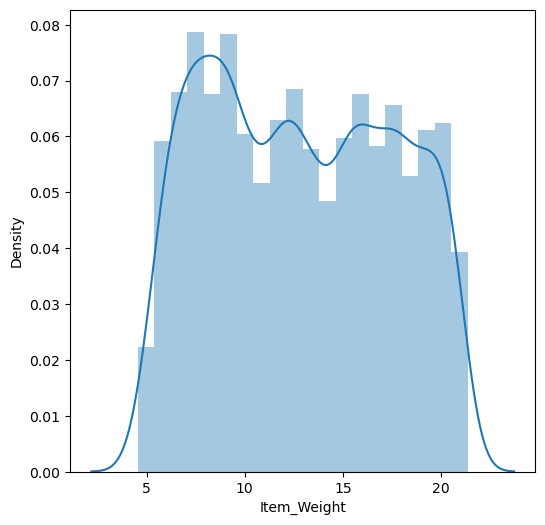

In [9]:
# Setting the size of the figure to 6 inches by 6 inches
plt.figure(figsize=(6,6))

# Creating a distribution plot for the 'Item_Weight' column in the 'bigmart_df' DataFrame
# 'sns.distplot()' is used to visualize the distribution of a univariate dataset
# It shows a histogram with a Kernel Density Estimate (KDE) by default
sns.distplot(bigmart_df['Item_Weight'])

# Displaying the plot
plt.show()

In [10]:
# Its look like that the item_weight is normaly distributed so that we can replace the missing values with mean
# Filling missing values in the 'Item_Weight' column of the 'bigmart_df' DataFrame
# 'fillna()' replaces NaN (missing) values with a specified value
# 'bigmart_df['Item_Weight'].mean()' calculates the mean of the 'Item_Weight' column
# 'inplace=True' modifies the DataFrame directly without creating a copy
bigmart_df['Item_Weight'].fillna(bigmart_df['Item_Weight'].mean(), inplace=True)

In [11]:
bigmart_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Define function to fill missing values
def fill_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        if row['Outlet_Type'] == 'Grocery Store':
            return 'Small'
        elif row['Outlet_Type'] == 'Supermarket Type1':
            return np.random.choice(['Small', 'Medium', 'High'])
        elif row['Outlet_Type'] == 'Supermarket Type2':
            return 'Medium'
        elif row['Outlet_Type'] == 'Supermarket Type3':
            return 'Medium'
    else:
        return row['Outlet_Size']

In [13]:
bigmart_df['Outlet_Size'] = bigmart_df.apply(fill_outlet_size, axis=1)

In [14]:
bigmart_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
bigmart_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Visualization

#### ['Item_Identifier']

In [16]:
bigmart_df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [17]:
bigmart_df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

#### ['Item_Weight']

In [18]:
bigmart_df['Item_Weight'].unique()               

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.85764518, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       13.35      , 18.85      , 14.6       , 13.85      , 13.        ,
        7.645     , 11.65      ,  5.925     , 19.25      , 18.6       ,
       18.7       , 17.85      , 10.        ,  8.85      ,  9.8       ,
       13.6       , 21.35      , 12.15      ,  6.42      , 19.6       ,
       15.85      ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 17.7       ,
       19.35      ,  8.645     , 15.6       , 18.25      ,  7.855     ,
        7.825     ,  8.39      , 12.85      , 19.        ,  5.905     ,
        7.76      , 16.75      , 15.5       ,  6.055     ,  6.305     ,
       20.85      , 20.75      ,  8.895     , 19.7       ,  8.75      ,
       13.3       ,  8.31      , 19.75      , 17.1       , 10.5 

In [19]:
bigmart_df['Item_Weight'].value_counts()

Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: count, Length: 416, dtype: int64

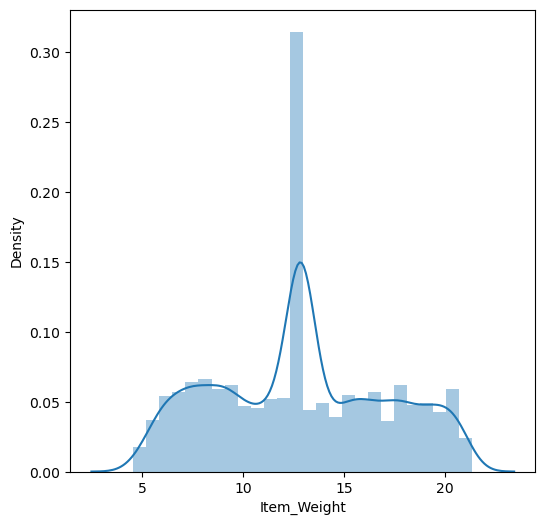

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(bigmart_df['Item_Weight'])
plt.show()

#### ['Item_Fat_Content']

In [21]:
bigmart_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
bigmart_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
# From above observation we need to change the LF and low fat to Low Fact and reg to Regular
bigmart_df.Item_Fat_Content.replace({"LF":"Low Fat"},inplace=True)
# Replace all in one line code
# bigmart_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
bigmart_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: count, dtype: int64

In [25]:
bigmart_df.Item_Fat_Content.replace({"low fat":"Low Fat"},inplace=True)
bigmart_df.Item_Fat_Content.replace({"reg":"Regular"},inplace=True)

In [26]:
bigmart_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

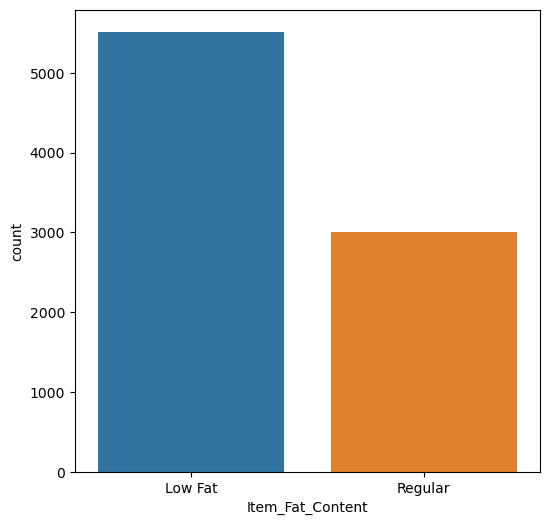

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bigmart_df)
plt.show()

In [28]:
bigmart_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### ['Item_Visibility']

In [29]:
bigmart_df.Item_Visibility.unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [30]:
bigmart_df.Item_Visibility.value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

#### ['Item_Type']

In [31]:
bigmart_df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [32]:
bigmart_df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

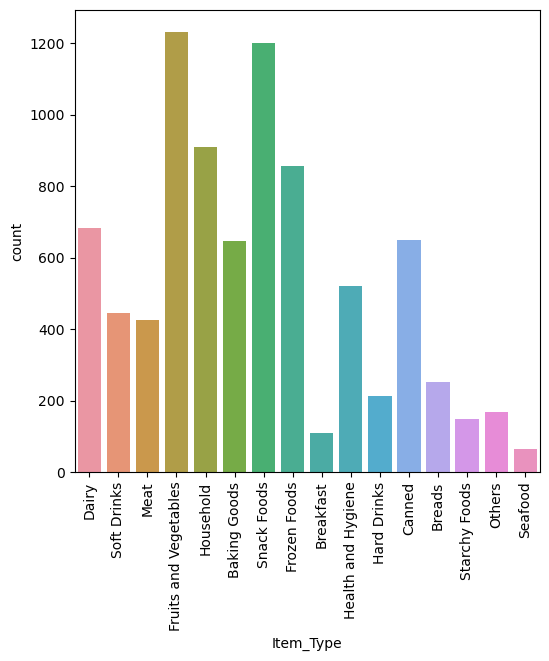

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Type',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

In [34]:
bigmart_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### ['Item_MRP']

In [35]:
bigmart_df.Item_MRP.unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [36]:
bigmart_df.Item_MRP.value_counts()

Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

#### ['Outlet_Identifier']

In [37]:
bigmart_df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [38]:
bigmart_df.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

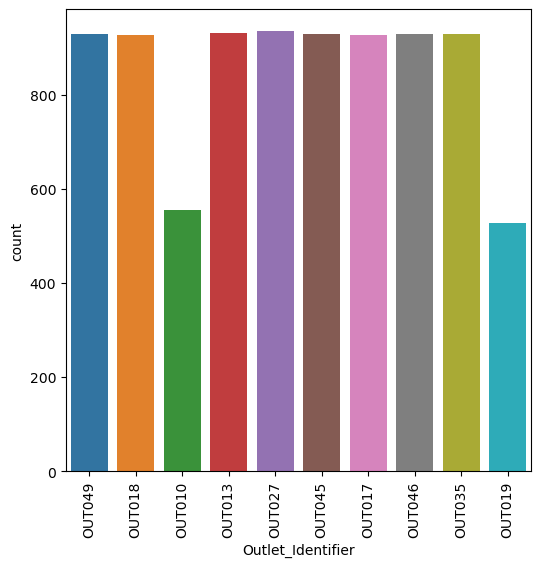

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Identifier',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

#### ['Outlet_Establishment_Year']

In [40]:
bigmart_df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [41]:
bigmart_df.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

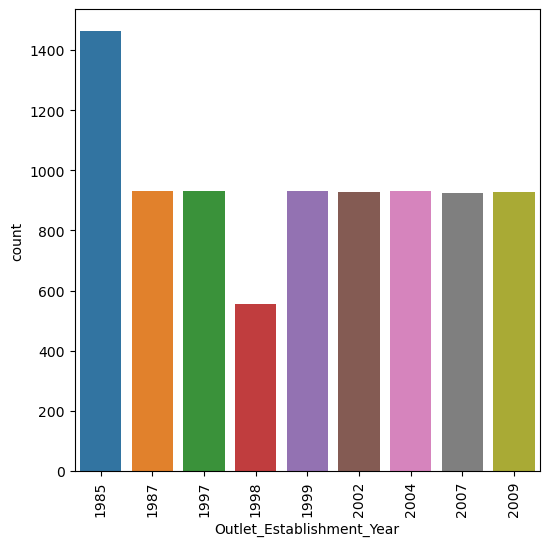

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

#### ['Outlet_Size']

In [43]:
bigmart_df.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [44]:
bigmart_df.Outlet_Size.value_counts()

Outlet_Size
Small     3621
Medium    3383
High      1519
Name: count, dtype: int64

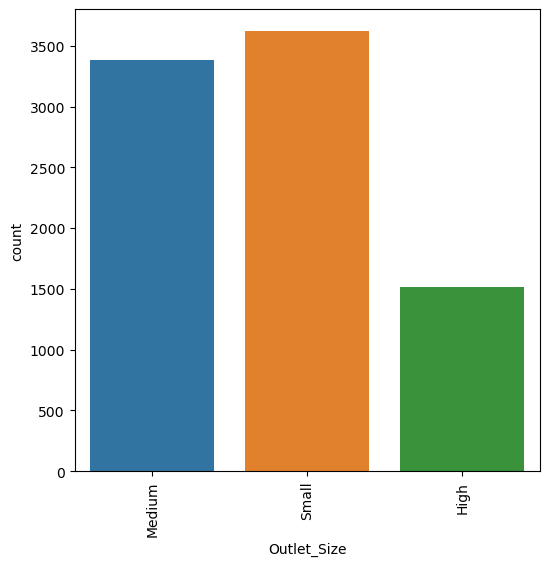

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

#### ['Outlet_Location_Type']

In [46]:
bigmart_df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [47]:
bigmart_df.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

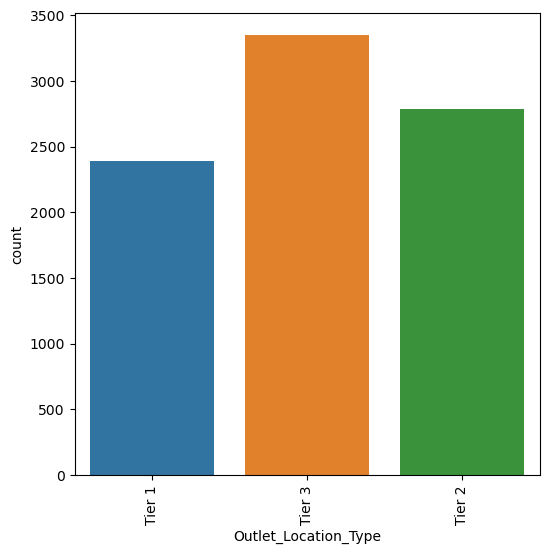

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

#### ['Outlet_Type']

In [49]:
bigmart_df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [50]:
bigmart_df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

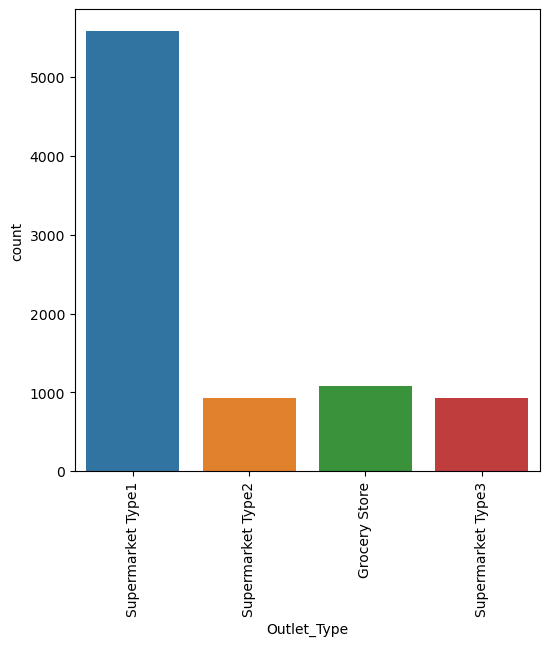

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=bigmart_df)
plt.xticks(rotation=90)
plt.show()

In [52]:
# Select categorical columns
categorical_columns = bigmart_df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [53]:
# Convert the categorical columns into the numerical format
encoder = LabelEncoder()

In [54]:
bigmart_df['Item_Identifier'] = encoder.fit_transform(bigmart_df['Item_Identifier'])

bigmart_df['Item_Fat_Content'] = encoder.fit_transform(bigmart_df['Item_Fat_Content'])

bigmart_df['Item_Type'] = encoder.fit_transform(bigmart_df['Item_Type'])

bigmart_df['Outlet_Identifier'] = encoder.fit_transform(bigmart_df['Outlet_Identifier'])

bigmart_df['Outlet_Size'] = encoder.fit_transform(bigmart_df['Outlet_Size'])

bigmart_df['Outlet_Location_Type'] = encoder.fit_transform(bigmart_df['Outlet_Location_Type'])

bigmart_df['Outlet_Type'] = encoder.fit_transform(bigmart_df['Outlet_Type'])

In [55]:
bigmart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [56]:
X = bigmart_df.drop(columns='Item_Outlet_Sales',axis=1)
y = bigmart_df.Item_Outlet_Sales

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [61]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor","GradientBoostingRegressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,938.724087,1.560674e+06,1249.269249,0.494449
Lasso,938.615356,1.560610e+06,1249.243622,0.494470
Ridge,938.713138,1.560676e+06,1249.270014,0.494448
SVR,1262.862240,2.980822e+06,1726.505818,0.034418
Decision Tree Regressor,1109.742163,2.534152e+06,1591.902099,0.179109
Random Forest Regressor,824.326859,1.378401e+06,1174.053448,0.553493
GradientBoostingRegressor,790.372775,1.280091e+06,1131.411246,0.585338


In [62]:
# Performing hyperparameter tunning
# gbr = GradientBoostingRegressor()

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Best parameters and model
# print("Best Parameters:", grid_search.best_params_)
# best_gbr = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_gbr.predict(X_test)
# print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
# print("R-squared:", r2_score(y_test, y_pred))

# Using one more method

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as XGB
from sklearn.svm import SVR
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

import warnings
warnings.filterwarnings('ignore')
bigmart_df = pd.read_csv('Bigmart.csv')

bigmart_df['Item_Weight'].fillna(bigmart_df['Item_Weight'].mean(), inplace=True)

def fill_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        if row['Outlet_Type'] == 'Grocery Store':
            return 'Small'
        elif row['Outlet_Type'] == 'Supermarket Type1':
            return np.random.choice(['Small', 'Medium', 'High'])
        elif row['Outlet_Type'] == 'Supermarket Type2':
            return 'Medium'
        elif row['Outlet_Type'] == 'Supermarket Type3':
            return 'Medium'
    else:
        return row['Outlet_Size']
		
bigmart_df['Outlet_Size'] = bigmart_df.apply(fill_outlet_size, axis=1)

bigmart_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

encoder = LabelEncoder()

bigmart_df['Item_Identifier'] = encoder.fit_transform(bigmart_df['Item_Identifier'])

bigmart_df['Item_Fat_Content'] = encoder.fit_transform(bigmart_df['Item_Fat_Content'])

bigmart_df['Item_Type'] = encoder.fit_transform(bigmart_df['Item_Type'])

bigmart_df['Outlet_Identifier'] = encoder.fit_transform(bigmart_df['Outlet_Identifier'])

bigmart_df['Outlet_Size'] = encoder.fit_transform(bigmart_df['Outlet_Size'])

bigmart_df['Outlet_Location_Type'] = encoder.fit_transform(bigmart_df['Outlet_Location_Type'])

bigmart_df['Outlet_Type'] = encoder.fit_transform(bigmart_df['Outlet_Type'])

X = bigmart_df.drop(columns='Item_Outlet_Sales',axis=1)
y = bigmart_df.Item_Outlet_Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,shuffle=True,test_size=.3)

#Dealing with Outliers
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

#Skewness Handling
y_train,_ = boxcox(y_train + 1)
y_test,_ = boxcox(y_test + 1)

#Data Normalization
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)


regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42,alpha=.7)),
    ('Lasso Regression', Lasso(random_state=42,alpha=0.3)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42,max_depth=5)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42,max_depth=4)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42,max_depth=3)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42,max_depth=3))
]


for clf_name, clf in regressors:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf_name}:')
    print('R2 Score: ', r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print('------------------------------------')

Linear Regression:
R2 Score:  0.6306382197244738
MSE:  50.1333237495057
MAE:  5.5778583774329
------------------------------------
Ridge Regression:
R2 Score:  0.6306373386130248
MSE:  50.1334433424032
MAE:  5.577880596310545
------------------------------------
Lasso Regression:
R2 Score:  0.6266882689779627
MSE:  50.669448952881446
MAE:  5.633320361880547
------------------------------------
Decision Tree Regressor:
R2 Score:  0.6920681935974942
MSE:  41.79545845710186
MAE:  4.989150591280138
------------------------------------
Random Forest Regressor:
R2 Score:  0.6910109854064843
MSE:  41.93895289356193
MAE:  5.013695366804504
------------------------------------
Gradient Boosting Regressor:
R2 Score:  0.6983052553087971
MSE:  40.94890461553994
MAE:  4.942453420157191
------------------------------------
XGBRegressor:
R2 Score:  0.688592940221402
MSE:  42.267153180051324
MAE:  5.024965587441035
------------------------------------


In [64]:
# Highest Accuracy is

# Gradient Boosting Regressor:
# R2 Score:  0.6978667701362509
# MSE:  41.0084200291223
# MAE:  4.942663886582292